# Hotel Cancelation Prediction
- Predicting Hotel Booking Cancellation is a machine learning classification project that will try to predict whether a booking will be cancelled or not using machine learning based on historical data.

## Problem Statement
- One of the problem is the rising rate of cancellation in the hotel industry where cancellation rate rose from under 33% in 2014 to 40% in 2018.
- This trend of cancellation also have causes hotel loss in opportunity cost (unsold room due to cancellation)

## Project Goals
- The Goals of this project is to find out the characteristic of customers who cancelled and finding a pattern in cancelled booking by doing an exploratory data analysis
- Building classification machine learning model to predict cancellation.

## Objectives
- Explore the Dataset: Dataset's basic information, summary statistics for numerical and categorical variables.
- Preprocessing: Handle missing values, Handle noisy data, Feature Engineering, Encode categorical variables
- EDA
- Model Building
- Evaluate and compare models

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

## 2. Read the Dataset

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# Dataset Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Inference
- Number of Entries: The dataset contains 119390 entries.

- Columns: The dataset contains 32 columns.

In [4]:
# Shape of the Dataset
df.shape

(119390, 32)

## 3. Cleaning Data and Outliers Handling

In [5]:
# Find the number of null values in the dataset
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Inference
- Children column has 4 missing values.
- Country column has 488 missing values.
- Agent column has 16,340 missing values.
- Company column has 112593 missing values.

### Handling Missing Values

In [6]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [7]:
# Impute missing values in 'children' column with 0
df['children'] = df['children'].fillna(0)

# Check if there are any missing values left in 'children' column
df['children'].isnull().sum()

0

In [8]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [9]:
#Imputing the missing values in country with mode.
df['country'] = df['country'].fillna(df['country'].value_counts().index[0])

In [10]:
# Company column has more than 90% of missing values, so dropping it.
# In the agent column imputing with mode will not be optimal and has most of the values are NaN,
# we can drop the agent column
df =df.drop(columns = ['agent', 'company'])

In [11]:
# Checking again if the dataset contains any null values
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Summary statistics for Numerical Variables

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


### Handling Outliers

<AxesSubplot: xlabel='adr'>

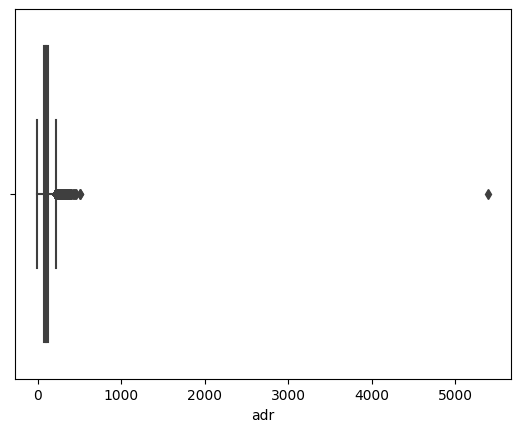

In [13]:
# Visualizing outliers using boxplot
sns.boxplot(x=df['adr'])

In [14]:
df[df['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [15]:
# Replace negative adr with median of adr column
df.loc[df['adr'] < 0, 'adr'] = df['adr'].median()

### Removing Noisy Data

In [16]:
# The bookings without adults, children, babies are not valid. 
# These enteries may be due to data entry error
not_valid=df[(df['children']==0) & (df['adults']==0) & (df['babies']==0)]
not_valid[['adults','babies','children']]

,adults,babies,children
2224,0,0,0.0
2409,0,0,0.0
3181,0,0,0.0
3684,0,0,0.0
3708,0,0,0.0
...,...,...,...
115029,0,0,0.0
115091,0,0,0.0
116251,0,0,0.0
116534,0,0,0.0


In [17]:
delete = (df['children']==0) & (df['adults']==0) & (df['babies']==0)
df = df[~delete]
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Remove directly related features

In [18]:
df.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

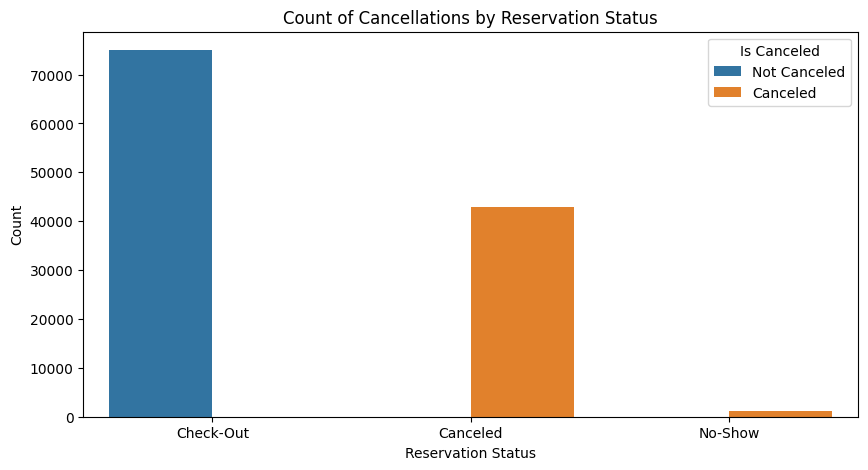

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(x='reservation_status', hue='is_canceled', data=df)
plt.title('Count of Cancellations by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

In [20]:
# reservation_status is a categorical feature that indicates the current status of a reservation.
# This feature is directly related to the target variable 'is_canceled'.
# Including this in the model would cause data leakage.
df = df.drop(['reservation_status'], axis=1)

In [21]:
# reservation_status_date is indicates the latest date at which the reservation_status was updated. 
# This feature is directly related to the target variable 'is_canceled'.
df = df.drop(['reservation_status_date'], axis=1)

In [22]:
df['arrival_date_year'].value_counts()

2016    56623
2017    40620
2015    21967
Name: arrival_date_year, dtype: int64

In [23]:
# Create new column 'total_people' combining adults, children, babies
df['total_people'] = df['adults'] + df['babies'] + df['children']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,2.0


In [24]:
# Create new column 'total_stay' by combining stays_in_weekend_nights and stays_in_week_nights
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [25]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_people,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,2.0,2


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

## Exploratory Data Analysis(EDA)

### 1. What are the number of different types of hotels?

Text(0.5, 1.0, 'Cancellation Rate Vs Hotel')

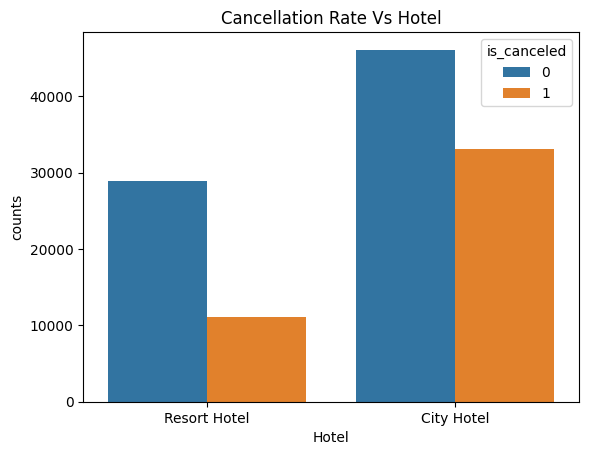

In [27]:
sns.countplot(data=df,x='hotel',hue='is_canceled')
plt.xlabel('Hotel')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Hotel')

**Inference**
- There are more number of City hotels compared to Resort. At the same time cancellations are more in City hotel.

### 2. What percentage of bookings are done each year?

Text(0.5, 1.0, 'Cancellation Rate Vs Year of Arrival')

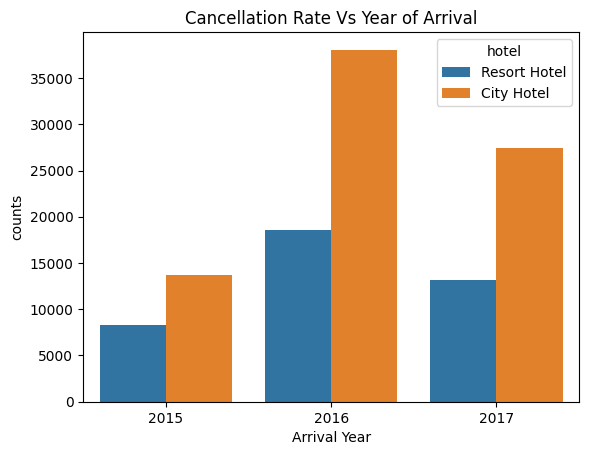

In [28]:
sns.countplot(data=df, x='arrival_date_year',hue='hotel')
plt.xlabel('Arrival Year')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Year of Arrival')

**Inference**
- More than double bookings were made in the year 2016 than previous year.
- Since it is just about 3 years(2015,2016,2017), it is not advisable to include whicch could bias the model towards specific years.
- So drop the column

In [29]:
df = df.drop(['arrival_date_year'], axis=1)

In [30]:
df = df.drop(columns=['country'],axis=1)
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_people,total_stay
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,2.0,0
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,2.0,0
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,1.0,1
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,1.0,1
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,2.0,2


### 3. Which months have the more number of bookings and cancellations?

Text(0.5, 1.0, 'Cancellation Rate Vs Month')

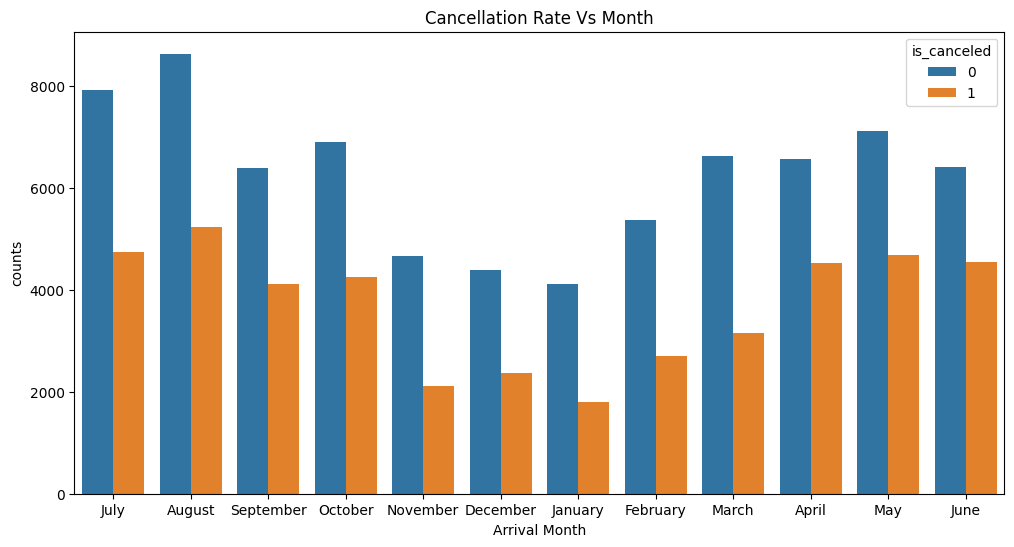

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='arrival_date_month',hue='is_canceled')
plt.xlabel('Arrival Month')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Month')

**Inference**
- There are more number of bookings done in 'Q2' and 'Q3'. The cancellations are in the ratio of 1:2.

## 4.Which distribution channel has the highest cancellation rate?

Text(0.5, 1.0, 'Cancellation Rate Vs Distribution channel')

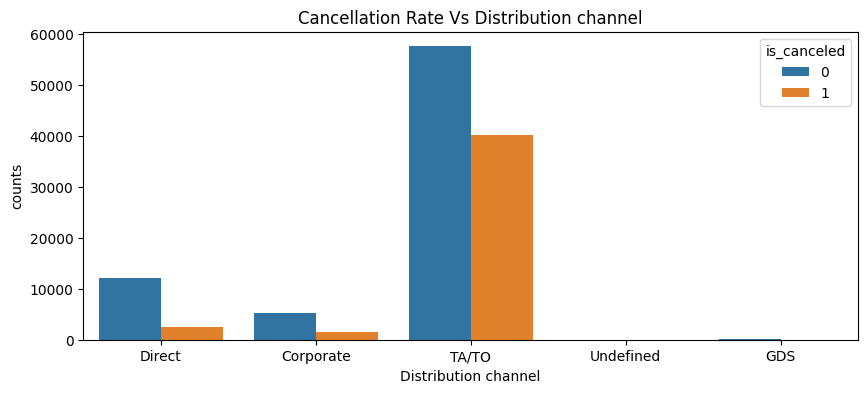

In [32]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='distribution_channel',hue='is_canceled')
plt.xlabel('Distribution channel')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Distribution channel')

**Inference**
- TA/TO has the highest canceellation rate.

In [33]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_people', 'total_stay'],
      dtype='object')

### 5. Are guests visiting the same hotel and what are their cancellation rates?

Text(0.5, 1.0, 'Cancellation Rate Vs Repeating Guest')

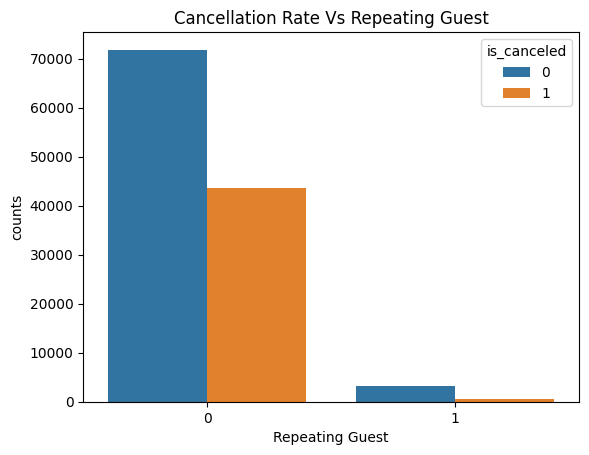

In [34]:
sns.countplot(data=df,x='is_repeated_guest',hue='is_canceled')
plt.xlabel('Repeating Guest')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Repeating Guest')

**Inference**
- Not much guests are booking the same hotel and there cancellations are also less.
- New guests cancellation chances are less, but there is some chance of cancellation

### 6.Which room type has the highest chance of cancellations?

Text(0.5, 1.0, 'Cancellation Rate Vs Reserved Room Type')

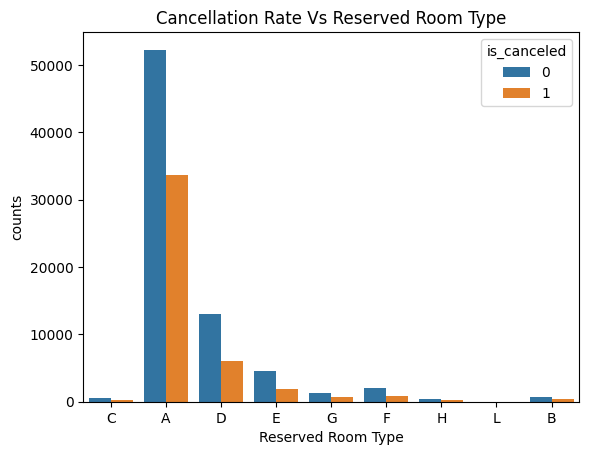

In [35]:
sns.countplot(data=df,x='reserved_room_type',hue='is_canceled')
plt.xlabel('Reserved Room Type')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Reserved Room Type')

**Inference**
- If the guests book room type == 'A', then there is a high chance of cancelations.

### 7.What is the behaviour of the guests on the assigned room type?

Text(0.5, 1.0, 'Cancellation Rate Vs Assigned Room Type')

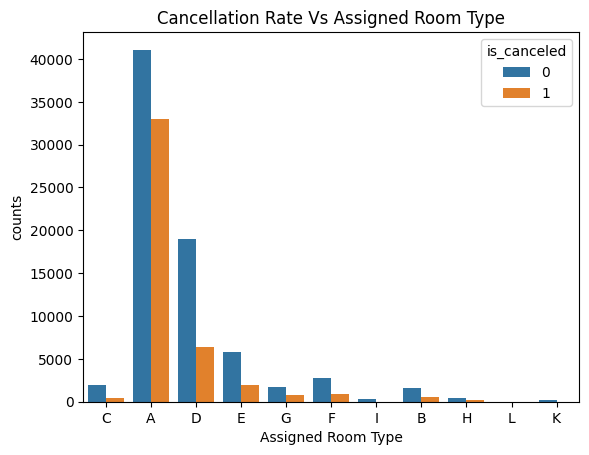

In [36]:
sns.countplot(data=df,x='assigned_room_type',hue='is_canceled')
plt.xlabel('Assigned Room Type')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Assigned Room Type')

In [37]:
# The assigned_room_type feature is the type of room assigned to the guest. 
# It is assigned after the booking is made, so it cannot be used to predict cancellations.
df = df.drop(['assigned_room_type'], axis=1)

In [38]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_people', 'total_stay'],
      dtype='object')

**Inference**
- If the hotel assigns room type 'A' there are more numberr of cancellations done.
- This may be due to lack of facilities in that room type.

### 8.Which deposit type has the highest cancellation rate?

Text(0.5, 1.0, 'Cancellation Rate Vs Deposit Type')

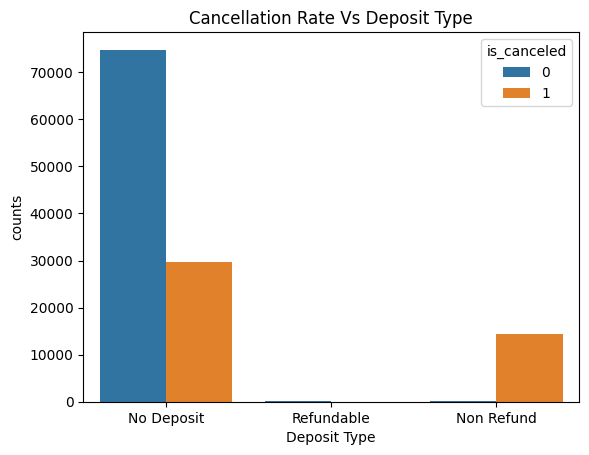

In [39]:
sns.countplot(data=df,x='deposit_type',hue='is_canceled')
plt.xlabel('Deposit Type')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Deposit Type')

**Inference**
- If the hotel has the policy of Non refundable, then the cancellations are high.
- We see less number of cancelations in 'No Deposit' type.

### 9.What type of customers are canceling the most?

Text(0.5, 1.0, 'Cancellation Rate Vs Type of Customer')

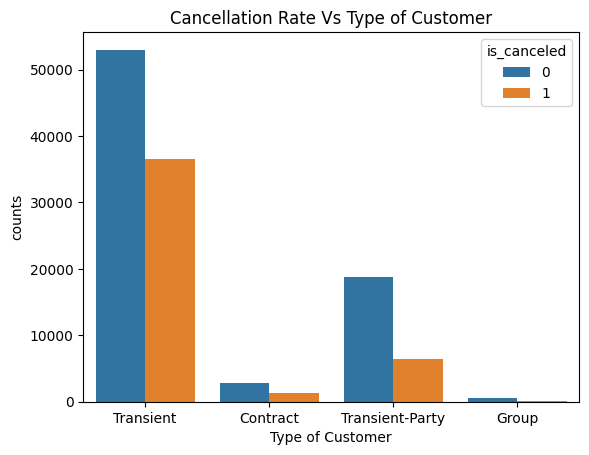

In [40]:
sns.countplot(data=df,x='customer_type',hue='is_canceled')
plt.xlabel('Type of Customer')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Type of Customer')

**Inference**
- Transient type of customers are cancelling the most.

### 10. What are the total number of stays by Market Segment?

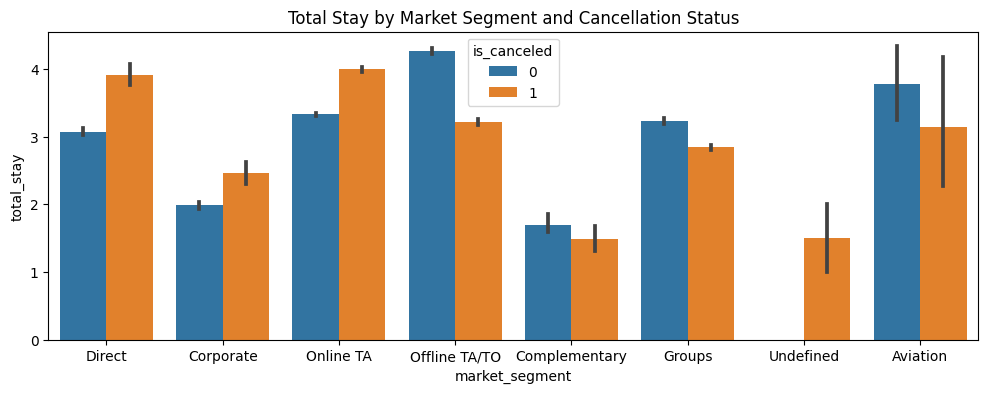

In [41]:
plt.figure(figsize=(12,4))
sns.barplot(x='market_segment', y='total_stay', hue='is_canceled', data=df)
plt.title('Total Stay by Market Segment and Cancellation Status')
plt.show()

**Inference**
- Direct, Corporate, Online TA market segment have more number of cancellations.

### 11. Lead Time Distribution

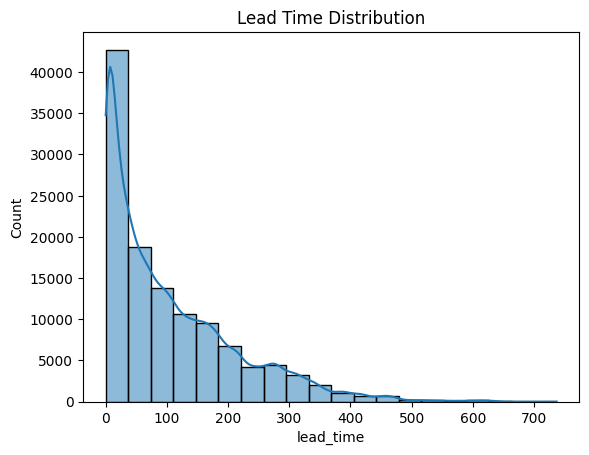

In [42]:
sns.histplot(df['lead_time'], bins=20, kde=True)
plt.title('Lead Time Distribution')
plt.show()

**Inference**
- The bookings are more with the lead_time between 0-100

### 12. How many days the guests are staying in the hotel depending on the deposit type?

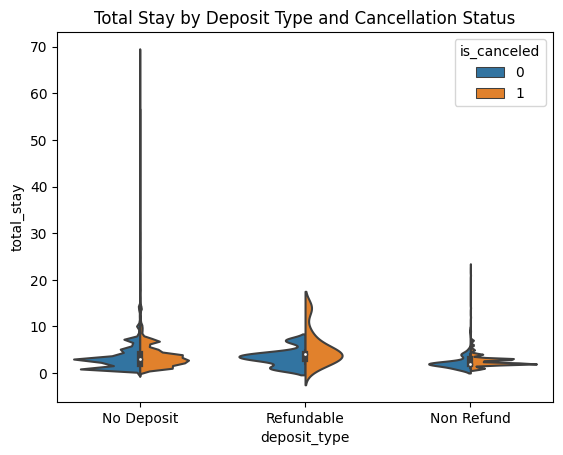

In [43]:
sns.violinplot(x='deposit_type', y='total_stay', hue='is_canceled', data=df, split=True)
plt.title('Total Stay by Deposit Type and Cancellation Status')
plt.show()

**Inference**
- We can see that total_stay increases, which has more profit for the hotel, if there is no initial deposit before checkin.

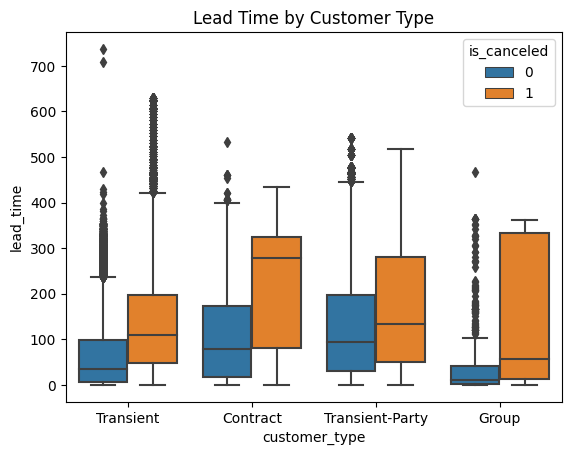

In [44]:
sns.boxplot(x='customer_type', y='lead_time', data=df, hue='is_canceled')
plt.title('Lead Time by Customer Type')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix of the Hotel Booking')

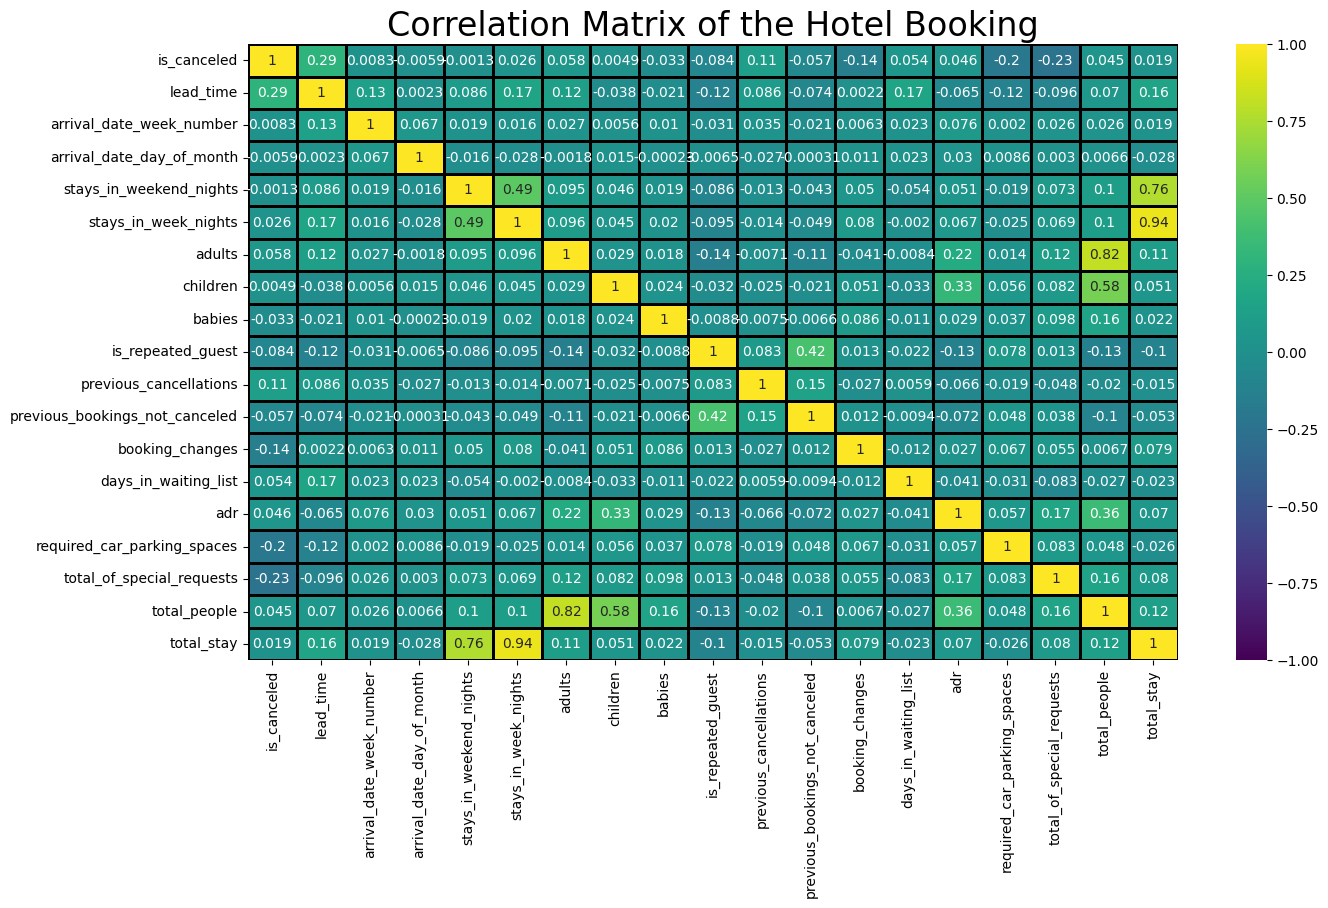

In [45]:
plt.figure(figsize=(15, 8))
correlation = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, linewidths=1, linecolor='black', cmap = "viridis")
correlation.set_title('Correlation Matrix of the Hotel Booking', fontdict={'fontsize': 24})

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_month              119210 non-null  object 
 4   arrival_date_week_number        119210 non-null  int64  
 5   arrival_date_day_of_month       119210 non-null  int64  
 6   stays_in_weekend_nights         119210 non-null  int64  
 7   stays_in_week_nights            119210 non-null  int64  
 8   adults                          119210 non-null  int64  
 9   children                        119210 non-null  float64
 10  babies                          119210 non-null  int64  
 11  meal                            119210 non-null  object 
 12  market_segment  

In [47]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_people,total_stay
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,3,No Deposit,0,Transient,0.0,0,0,2.0,0
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,4,No Deposit,0,Transient,0.0,0,0,2.0,0
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,0,No Deposit,0,Transient,75.0,0,0,1.0,1
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,0,No Deposit,0,Transient,75.0,0,0,1.0,1
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,0,No Deposit,0,Transient,98.0,0,1,2.0,2


# Encoding Categorical Variables

### Label Encoding
- arrival_date_month: This is an ordinal variable.

In [48]:
# Convert 'arrival_date_month' to numerical values
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: months.index(x) + 1)

### One-Hot Encoding
- hotel
- meal
- market_segment
- distribution_channel
- reserved_room_type
- deposit_type
- customer_type

In [49]:
one_hot_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [50]:
df.head()

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_people,total_stay,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,7,27,1,0,0,2,0.0,0,0,0,0,3,0,0.0,0,0,2.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,737,7,27,1,0,0,2,0.0,0,0,0,0,4,0,0.0,0,0,2.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,7,7,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0,1.0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,13,7,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0,1.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,14,7,27,1,0,2,2,0.0,0,0,0,0,0,0,98.0,0,1,2.0,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119210 non-null  int64  
 1   lead_time                       119210 non-null  int64  
 2   arrival_date_month              119210 non-null  int64  
 3   arrival_date_week_number        119210 non-null  int64  
 4   arrival_date_day_of_month       119210 non-null  int64  
 5   stays_in_weekend_nights         119210 non-null  int64  
 6   stays_in_week_nights            119210 non-null  int64  
 7   adults                          119210 non-null  int64  
 8   children                        119210 non-null  float64
 9   babies                          119210 non-null  int64  
 10  is_repeated_guest               119210 non-null  int64  
 11  previous_cancellations          119210 non-null  int64  
 12  previous_booking

In [52]:
df.head()

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_people,total_stay,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,7,27,1,0,0,2,0.0,0,0,0,0,3,0,0.0,0,0,2.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,737,7,27,1,0,0,2,0.0,0,0,0,0,4,0,0.0,0,0,2.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,7,7,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0,1.0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,13,7,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0,1.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,14,7,27,1,0,2,2,0.0,0,0,0,0,0,0,98.0,0,1,2.0,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Split the Dataset

In [53]:
# Define the features (X) and the output labels (y)
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [54]:
# Splitting data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
X_train.head()

,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_people,total_stay,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
30161,0,2,7,12,1,0,2,0.0,0,1,0,2,0,0,68.0,1,2,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
114451,116,6,25,20,0,2,2,0.0,0,0,0,0,0,0,117.0,0,0,2.0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
20243,0,1,4,20,0,1,1,0.0,0,0,0,0,0,0,30.0,0,0,1.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
77657,0,12,51,15,0,1,1,0.0,0,1,0,1,0,0,75.0,0,0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
30906,40,12,49,1,2,5,1,0.0,0,0,0,0,0,0,48.0,0,0,1.0,7,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [56]:
y_train.head()

30161     0
114451    0
20243     0
77657     0
30906     0
Name: is_canceled, dtype: int64

In [57]:
X_test.head()

,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_people,total_stay,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
54842,386,7,31,28,0,2,2,0.0,0,0,0,0,0,0,62.00,0,0,2.0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
45523,100,10,44,31,1,1,2,0.0,0,0,0,0,0,0,62.00,0,0,2.0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22558,70,3,13,21,3,5,2,0.0,0,0,0,0,1,0,39.30,0,1,2.0,8,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
105764,15,2,7,14,0,1,2,0.0,1,0,0,0,0,0,259.00,0,3,3.0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
95702,199,8,34,19,2,2,3,0.0,0,0,0,0,0,0,167.35,0,2,3.0,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [58]:
y_test.head()

54842     1
45523     0
22558     0
105764    0
95702     0
Name: is_canceled, dtype: int64

# Model Training

## 1. KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [60]:
knn_model = KNeighborsClassifier()

In [61]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [62]:
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

In [63]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     59959
           1       0.83      0.73      0.77     35409

    accuracy                           0.84     95368
   macro avg       0.84      0.82      0.83     95368
weighted avg       0.84      0.84      0.84     95368



In [64]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83     15052
           1       0.72      0.64      0.68      8790

    accuracy                           0.77     23842
   macro avg       0.76      0.75      0.75     23842
weighted avg       0.77      0.77      0.77     23842



**Inference**
- It is not performing well on either training and test set.

## 2. Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
log_model = LogisticRegression()

In [67]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [68]:
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)

In [69]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85     59959
           1       0.79      0.61      0.69     35409

    accuracy                           0.79     95368
   macro avg       0.79      0.75      0.77     95368
weighted avg       0.79      0.79      0.79     95368



In [70]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85     15052
           1       0.78      0.61      0.69      8790

    accuracy                           0.79     23842
   macro avg       0.79      0.76      0.77     23842
weighted avg       0.79      0.79      0.79     23842



**Inference**
- It is not performing well on training set.

## 3. Decision Tree Model

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dt_model = DecisionTreeClassifier()

In [73]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

In [75]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     59959
           1       0.99      0.98      0.99     35409

    accuracy                           0.99     95368
   macro avg       0.99      0.99      0.99     95368
weighted avg       0.99      0.99      0.99     95368



In [76]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     15052
           1       0.76      0.77      0.76      8790

    accuracy                           0.82     23842
   macro avg       0.81      0.81      0.81     23842
weighted avg       0.82      0.82      0.82     23842



**Inference**
- It is performing well on training data, but not on test data. So it is an overfit model.
- Let's perform Hyperparameter tuning to select the appropriate parameters.

### Hyperparameter Tuning

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [78]:
# Create a pipeline for StandardScaler and DecisionTreeClassifier
dt_pipeline = Pipeline([
    ("scaler",StandardScaler()),
    ("algo",DecisionTreeClassifier())
])

In [80]:
# Specify the different combinations for hyperparameters
param_grid = {
    'algo__criterion': ['gini', 'entropy'],
    'algo__max_depth': [None, 5, 10, 15],
    'algo__min_samples_split': [2, 5, 10],
#     'algo__min_samples_leaf': [1, 2, 4]
}

# GridSearch uses different combinations and their values and calculates the performance for each combination.
# And selects the best value for hyperparameters
model_dt = GridSearchCV(estimator=dt_pipeline,param_grid=param_grid,cv=10,n_jobs=-1,verbose=1,scoring='accuracy')

#After tuning the model,using the 'fit' method which trains the algorithm on the training data
model_dt.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('algo', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'algo__criterion': ['gini', 'entropy'],
                         'algo__max_depth': [None, 5, 10, 15],
                         'algo__min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [81]:
#best_estimator_: Estimator that was chosen by the search.

best_clf = model_dt.best_estimator_
best_score = model_dt.best_score_
print(best_clf)
print(best_score)

Pipeline(steps=[('scaler', StandardScaler()),
                ('algo', DecisionTreeClassifier(max_depth=15))])
0.8288944686818487


In [82]:
# Prediction
y_train_pred_tuned_dt = best_clf.predict(X_train)
y_test_pred_tuned_dt = best_clf.predict(X_test)

In [83]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix, precision_score,roc_curve, auc

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred_tuned_dt)
print("Accuracy:", accuracy)

# Calculate F1-score
f1 = f1_score(y_test, y_test_pred_tuned_dt, average='weighted')
print("F1-score:", f1)

# Calculate precision
precision = precision_score(y_test, y_test_pred_tuned_dt, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_test_pred_tuned_dt, average='weighted')
print("Recall:", recall)

print(f"Training Accuracy : {best_score}")
print(f"Testing Accuracy : {accuracy}")

Accuracy: 0.8271118194782316
F1-score: 0.8238737978007985
Precision: 0.8258138783412479
Recall: 0.8271118194782316
Training Accuracy : 0.8288944686818487
Testing Accuracy : 0.8271118194782316


In [84]:
print(model_dt.best_params_)

{'algo__criterion': 'gini', 'algo__max_depth': 15, 'algo__min_samples_split': 2}


In [85]:
print(classification_report(y_train,y_train_pred_tuned_dt))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     59959
           1       0.86      0.73      0.79     35409

    accuracy                           0.86     95368
   macro avg       0.86      0.83      0.84     95368
weighted avg       0.86      0.86      0.85     95368



In [86]:
print(classification_report(y_test,y_test_pred_tuned_dt))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     15052
           1       0.81      0.69      0.75      8790

    accuracy                           0.83     23842
   macro avg       0.82      0.80      0.81     23842
weighted avg       0.83      0.83      0.82     23842



**Inference**
- It is now performing same on both training and testing data, which is not overfit, hence it is a good model.

## 4. Random Forest 

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf_model = RandomForestClassifier()

In [89]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [90]:
# Prediction
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [91]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     59959
           1       0.99      0.98      0.99     35409

    accuracy                           0.99     95368
   macro avg       0.99      0.99      0.99     95368
weighted avg       0.99      0.99      0.99     95368



In [92]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     15052
           1       0.86      0.76      0.81      8790

    accuracy                           0.87     23842
   macro avg       0.87      0.84      0.85     23842
weighted avg       0.87      0.87      0.86     23842



**Inference**
- It is performing well on training data, but not on test data. So it is an overfit model.
- Let's perform Hyperparameter tuning to select the appropriate parameters.

### Hyperparameter Tuning

In [93]:
# Create a pipeline for StandardScaler and DecisionTreeClassifier
rf_pipeline = Pipeline([
    ("scaler",StandardScaler()),
    ("algo",RandomForestClassifier())
])

In [94]:
# Define the hyperparameter grid for RandomForestClassifier
param_grid = {
    'algo__n_estimators': [50, 100, 200],
    'algo__max_depth': [None, 5, 10],
    'algo__min_samples_split': [2, 5, 10],
#     'algo__min_samples_leaf': [1, 2, 4]
}

# GridSearch uses different combinations and their values and calculates the performance for each combination.
# And selects the best value for hyperparameters
rf_model_tuned = GridSearchCV(estimator=rf_pipeline,param_grid=param_grid,cv=10,n_jobs=-1,verbose=1,scoring='accuracy')

#After tuning the model,using the 'fit' method which trains the algorithm on the training data
rf_model_tuned.fit(X_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('algo', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'algo__max_depth': [None, 5, 10],
                         'algo__min_samples_split': [2, 5, 10],
                         'algo__n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [95]:
#best_estimator_: Estimator that was chosen by the search.

best_clf = rf_model_tuned.best_estimator_
best_score = rf_model_tuned.best_score_
print(best_clf)
print(best_score)

Pipeline(steps=[('scaler', StandardScaler()),
                ('algo', RandomForestClassifier(n_estimators=200))])
0.8614734644844908


In [96]:
# Prediction
y_train_pred_tuned = best_clf.predict(X_train)
y_test_pred_tuned = best_clf.predict(X_test)

In [102]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred_tuned)
print("Accuracy:", accuracy)

# Calculate F1-score
f1 = f1_score(y_test, y_test_pred_tuned, average='weighted')
print("F1-score:", f1)

# Calculate precision
precision = precision_score(y_test, y_test_pred_tuned, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_test_pred_tuned, average='weighted')
print("Recall:", recall)

print(f"Training Accuracy : {best_score}")
print(f"Testing Accuracy : {accuracy}")

Accuracy: 0.8675027262813523
F1-score: 0.865485308287751
Precision: 0.867313879860287
Recall: 0.8675027262813523
Training Accuracy : 0.8614734644844908
Testing Accuracy : 0.8675027262813523


**Inference**
- It is now performing same on both training and testing data.
- Hence, it is a best model.

In [103]:
# Predict probabilities of positive class
y_prob = best_clf.predict_proba(X_test)[:, 1]

In [104]:
# Calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [105]:
# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

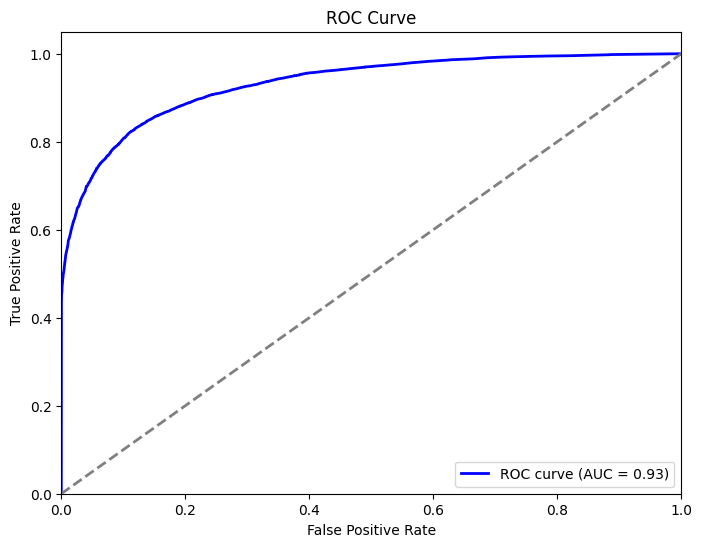

In [106]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Inference**
- An AUC score of 0.93 suggests that the classifier has excellent discrimination ability and effectively separates positive and negative instances in the dataset.
- The model has very few misclassifications.

# Conclusion: Hotel Booking Cancellation Prediction

### 1.Problem
- The goal of this project was to develop a machine learning model to predict hotel booking cancellations.
- The dataset contained various features related to hotel bookings, including lead time, arrival date, customer demographics, booking details, and special requests.

### 2.Model Building Process
- Began by exploring and preprocessing the dataset, which included handling missing values, encoding categorical variables, and feature engineering. And then experimented with several machine learning algorithms, including Decision Tree, Random Forest, and Logistic Regression. Hyperparameter tuning was performed using GridSearchCV to optimize model performance.

### 3.Model Performance
- The models were evaluated using metrics such as accuracy, precision, recall, F1-score, and ROC AUC. Among the models tested, the Random Forest classifier achieved the highest performance, with an accuracy of 86% and an F1-score of 0.86 on the test set. The ROC AUC score was 0.93, indicating excellent discriminatory power.

### 4.Interpretation of Results
- The Random Forest model demonstrated strong predictive performance for hotel booking cancellations. The model successfully captured complex interactions between features and accurately classified cancellations across different customer segments.

### 5.Conclusion
- The developed Random Forest model provides a valuable tool for hotel managers to predict and manage booking cancellations effectively. This can maximise their revenue and also optimise their operations, enhance customer satisfaction.